In [81]:
#%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [82]:
from matplotlib.patches import ConnectionPatch

df = pd.read_csv('../../data/DATA_1.csv', delimiter=',')

In [83]:
df.columns  = ["Magnitude","Latitude","Longitude","Depth","Date","Time"]


<AxesSubplot:xlabel='Magnitude'>

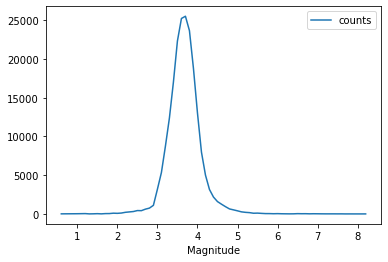

In [84]:
df_magnitude_count = df[["Magnitude"]].groupby(["Magnitude"]).size().reset_index(name='counts')
df_magnitude_count.plot(x="Magnitude",y="counts")

<br>
<h2> b - value analysis </h2>

<p>s
The Magnitude count stops accelerating accelerating at 3.8, thus we will choose 3.8 as the cut-off magnitude.
</p><br>

In [85]:
x = df['Date'] + ' ' + df['Time']
df["Datetime"] = pd.to_datetime(x, format='%Y/%m/%d %H:%M:%S')
df.drop(["Date","Time"], axis=1, inplace=True)
df

,Magnitude,Latitude,Longitude,Depth,Datetime
0,7.4,20.00,-105.00,33.0,1900-01-20 06:33:30
1,6.9,20.00,-105.00,33.0,1900-05-16 20:12:00
2,6.9,25.00,-110.00,33.0,1901-03-05 10:45:00
3,7.0,26.00,-110.00,33.0,1901-12-09 02:17:00
4,7.0,17.62,-99.72,33.0,1902-01-16 23:19:00
...,...,...,...,...,...
204801,3.5,16.29,-98.19,21.0,2021-05-29 20:35:53
204802,3.4,20.40,-105.16,5.0,2021-05-29 20:45:42
204803,3.5,15.89,-98.44,8.0,2021-05-29 21:00:25
204804,3.4,17.14,-99.07,51.0,2021-05-29 21:52:05


<AxesSubplot:xlabel='Magnitude'>

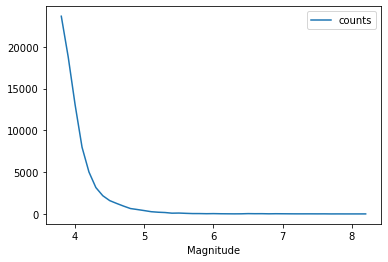

In [86]:
df_complete=df
df=df.loc[df.Magnitude >= 3.8]
df.reset_index(drop=True,inplace=True)

df_magnitude_count = df[["Magnitude"]].groupby(["Magnitude"]).size().reset_index(name='counts')
df_magnitude_count.plot(x="Magnitude",y="counts")

In [87]:
def b_value(x):
     return x._get_numeric_data().apply(axis=0, func=np.log).mean()

df_yearly_magnitude = df.groupby(df.Datetime.dt.year)["Magnitude"]
df_yearly_magnitude_mean = df_yearly_magnitude.mean()
df_yearly_count = df_yearly_magnitude.count()
df_yearly_variance = df_yearly_magnitude.var()
df_yearly_b_val = df_yearly_magnitude_mean.apply(lambda x: (np.log(np.e))/(x-3.8))

<AxesSubplot:title={'center':'Variance'}, xlabel='Datetime'>

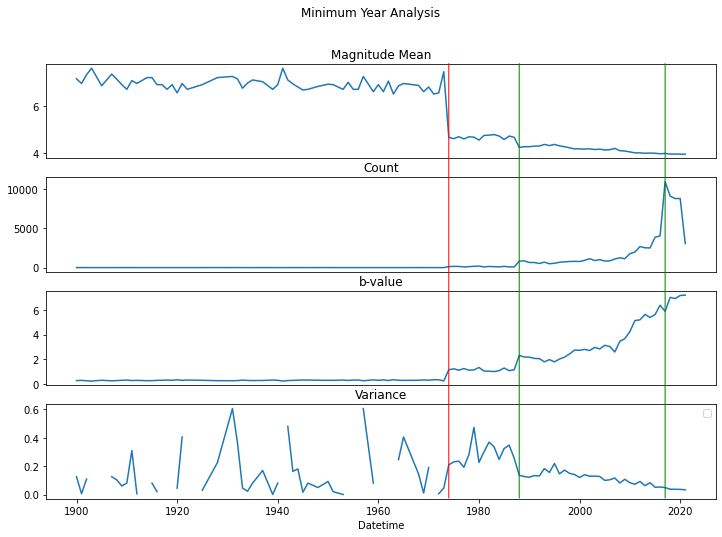

In [88]:
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.suptitle('Minimum Year Analysis')
fig.set_size_inches(12, 8)
minimum_year_1=1974
minimum_year_2=1988
minimum_year_3=2017

con1 = ConnectionPatch(xyA=[minimum_year_1,7.8], xyB=[minimum_year_1,-.025], coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[3], color="red")
con2 = ConnectionPatch(xyA=[minimum_year_2,7.8], xyB=[minimum_year_2,-.025], coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[3], color="green")
con3 = ConnectionPatch(xyA=[minimum_year_3,7.8], xyB=[minimum_year_3,-.025], coordsA="data", coordsB="data", axesA=axes[0], axesB=axes[3], color="green")

fig.add_artist(con1)
fig.add_artist(con2)
fig.add_artist(con3)

plt.legend(["red", "green"])
df_yearly_magnitude_mean.plot(ax=axes[0],kind="line",xlabel="",xticks=[],title="Magnitude Mean",legend=[])
df_yearly_count.plot(ax=axes[1],kind="line",title="Count",xlabel="",xticks=[])
df_yearly_b_val.plot(ax=axes[2],kind="line",title="b-value",xlabel="",xticks=[])
df_yearly_variance.plot(ax=axes[3],kind="line",title="Variance")

In [89]:
df=df.loc[df.Datetime.dt.year >= 2017]
df.to_csv("../../data/DATA_2_2017.csv", index=False)

In [90]:
"""
df_complete.to_csv("../../data/DATA_2_Complete.csv", index=False)
df.to_csv("../../data/DATA_2.csv", index=False)
print("DATA_2_Complete ... saved")
print("DATA_2 ... saved")
"""


'\ndf_complete.to_csv("../../data/DATA_2_Complete.csv", index=False)\ndf.to_csv("../../data/DATA_2.csv", index=False)\nprint("DATA_2_Complete ... saved")\nprint("DATA_2 ... saved")\n'